#Taller Calculo de Raices
## Harry Guajan - Matthew Cedeño

**Problema:**  
2. Encuentre todos los puntos en los que la curva  
$$\left( \frac{y}{2} \right)^2 = \left( -\frac{x+3}{2} \right)^2 - 1$$  
interseca el eje $y = -2$.

### Código Usado

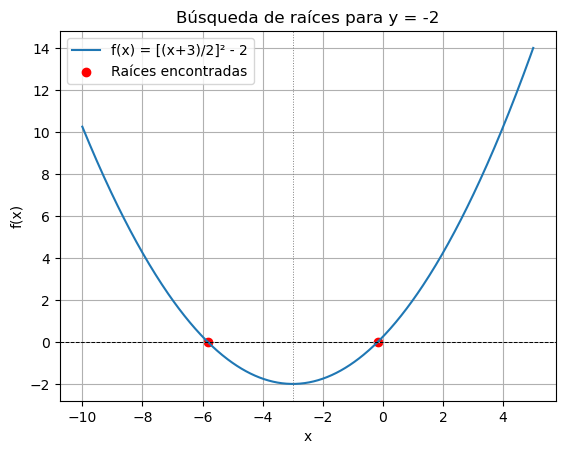


Puntos de intersección encontrados:
(-5.828427, -2)
(-0.171573, -2)

Soluciones exactas:
x₁ = -0.171573
x₂ = -5.828427


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Ecuación original reescrita para y = -2: [(x+3)/2]² - [(-2)/2]² - 1 = 0
def f(x):
    return ((x + 3)/2)**2 - ((-2)/2)**2 - 1  # Simplificado a: (x+3)²/4 - 2

# Derivada CORREGIDA: d/dx [(x+3)²/4 - 2] = (x+3)/2
def df(x):
    return (x + 3)/2

# Método de Newton-Raphson con protección contra divergencia
def newton_raphson(x0, tol=1e-6, max_iter=100):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(dfx) < 1e-10:  # Evitar división por cero
            raise ValueError("Derivada cercana a cero")
        x_new = x - fx / dfx
        if abs(x_new) > 1e6:  # Detener si diverge
            raise ValueError("Divergencia detectada")
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    raise ValueError("No converge después de 100 iteraciones")

# Puntos iniciales basados en soluciones teóricas aproximadas
initial_guesses = [-6, 0]  # Cercanos a las soluciones x ≈ -5.83 y x ≈ -0.17

# Encontrar raíces
soluciones = []
for guess in initial_guesses:
    try:
        root = newton_raphson(guess)
        soluciones.append((root, -2))
    except ValueError as e:
        print(f"Error con x0 = {guess}: {e}")

# Gráfica
x_vals = np.linspace(-10, 5, 500)
plt.plot(x_vals, f(x_vals), label="f(x) = [(x+3)/2]² - 2")
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.axvline(-3, color='gray', linestyle=':', linewidth=0.7)  # Asíntota vertical en x=-3
plt.scatter([p[0] for p in soluciones], [0]*len(soluciones), color='red', label="Raíces encontradas")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Búsqueda de raíces para y = -2")
plt.legend()
plt.grid()
plt.show()

# Resultados
print("\nPuntos de intersección encontrados:")
for punto in soluciones:
    print(f"({punto[0]:.6f}, {punto[1]})")

# Verificación exacta
exacto = [-3 + 2*np.sqrt(2), -3 - 2*np.sqrt(2)]
print("\nSoluciones exactas:")
print(f"x₁ = {exacto[0]:.6f}")
print(f"x₂ = {exacto[1]:.6f}")

Raíces encontradas: [1.24998 1.25001]


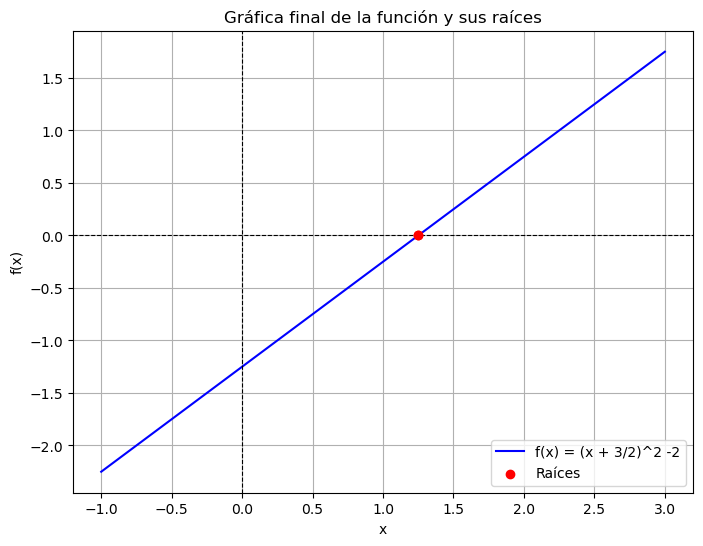

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
from IPython.display import clear_output
import time

# Definir la función y su derivada
def f(x):
    return x + 3/2**2 - 2

def f_prime(x):
    return x + 3/2 

# Aproximaciones iniciales
aproximaciones = [0, 1, 2]
raices = []

# Método de Newton usando scipy con animación
for x0 in aproximaciones:
    try:
        # Configuración inicial de la gráfica
        x = np.linspace(-1, 3, 1000)
        y = f(x)
        
        x_current = x0
        for i in range(100):  # máximo 100 iteraciones
            plt.figure(figsize=(8, 6))
            plt.plot(x, y, label='f(x) = (x + 3/2)^2 -2', color='blue')
            plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
            plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
            
            # Punto actual de la iteración
            plt.scatter([x_current], [f(x_current)], color='red', s=100, 
                       label=f'Iteración {i+1}')
            
            plt.title(f'Método de Newton - Iteración {i+1}\nValor actual: x = {x_current:.6f}')
            plt.xlabel('x')
            plt.ylabel('f(x)')
            plt.grid()
            plt.legend()
            
            # Mostrar la gráfica
            display(plt.gcf())
            clear_output(wait=True)
            plt.close()
            
            # Calcular siguiente valor
            x_new = x_current - f(x_current)/f_prime(x_current)
            
            # Verificar convergencia
            if abs(x_new - x_current) < 1e-5:
                raices.append(x_new)
                break
                
            x_current = x_new
            time.sleep(0.5)  # Pausa para ver la animación
            
    except RuntimeError:
        print(f"El método de Newton no convergió para x0 = {x0}.")

# Eliminar duplicados y mostrar resultado final
raices_unicas = np.unique(np.round(raices, decimals=5))
print(f"Raíces encontradas: {raices_unicas}")

# Gráfica final
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='f(x) = (x + 3/2)^2 -2', color='blue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.scatter(raices_unicas, f(raices_unicas), color='red', label='Raíces', zorder=5)
plt.title('Gráfica final de la función y sus raíces')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.legend()
plt.show()